이번에는 실습에서 진행했던 것 과 유사하게, 시장 고객 분석 둘 중 하나를 진행해주시면 됩니다!

#  과제 : 시장 소비자 세분화(Segmentation)

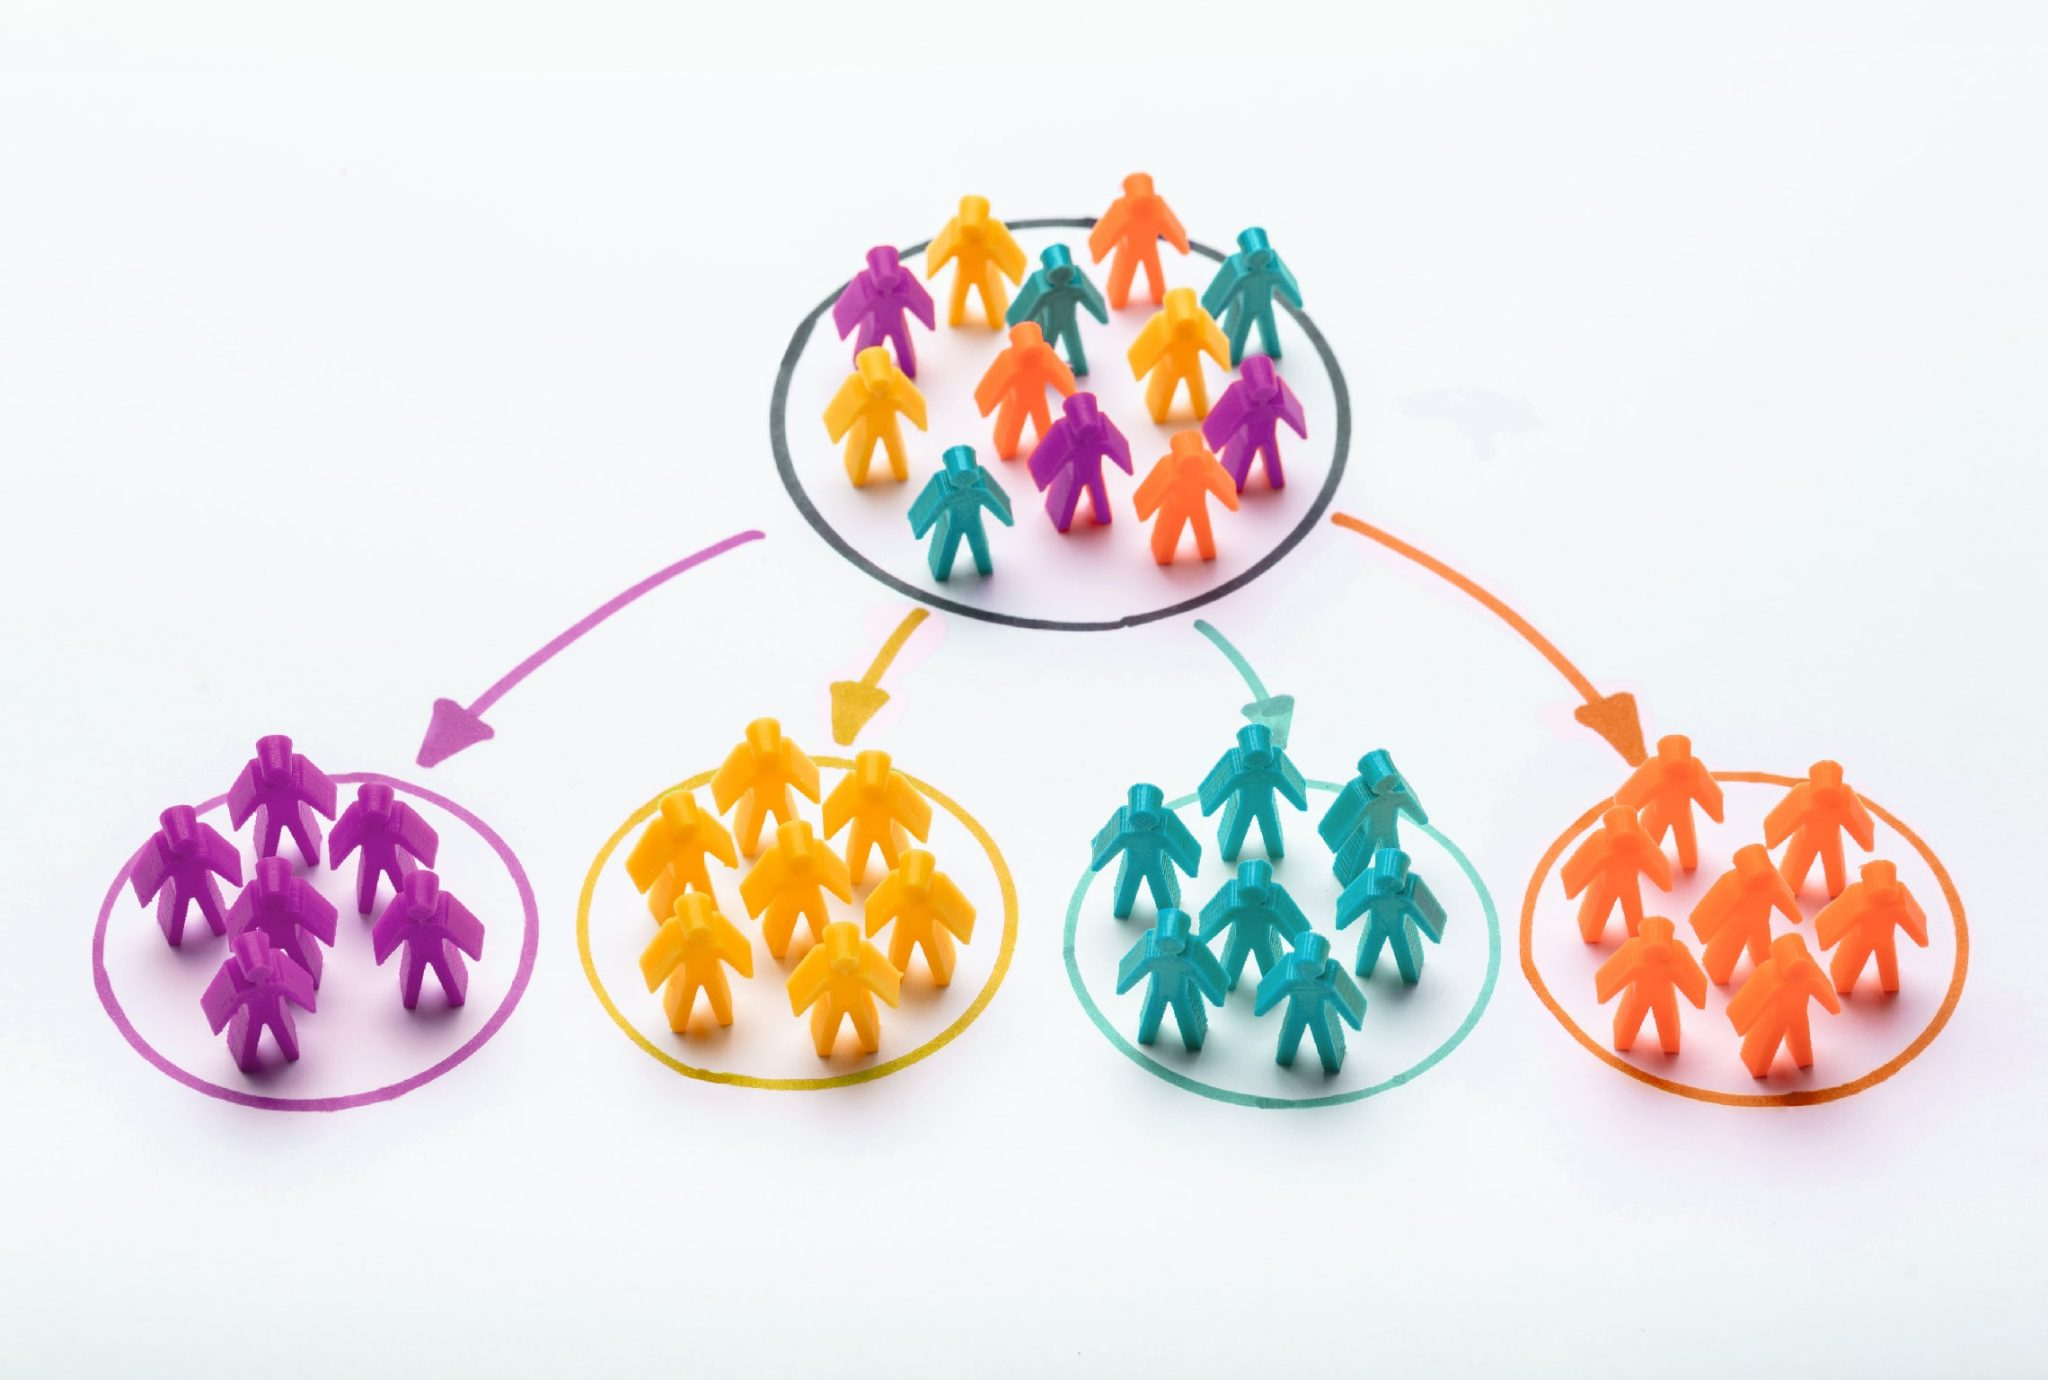

 부장님에게 업무가 할당되었다.

부장 : O팀장, 지난주에 부탁했던 소비자 분석은 어떻게 되었나?

You : 아,, 그게 시장의 소비자 데이터는 모았는데 아직 특성 파악을 못하였습니다.

부장 : 제품 출시가 코 앞이니, STP 마케팅 전략의 수행을 위해 빠르게 잠재적 고객을 세분화 해주길 바라네!

속마음 : (어디보자.. 우리의 고객들은...)

## 도매점 방문 고객 데이터 가져오기

In [1]:
import pandas as pd

wholesale_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
wholesale_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [2]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
wholesale_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

"고객의 데이터가 누락없이 잘 반영되었군!"

## Scaling

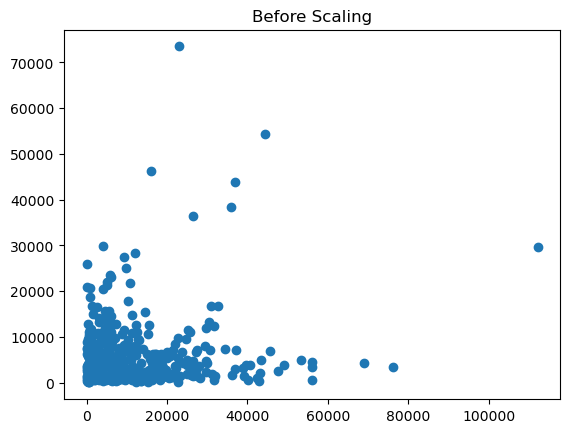

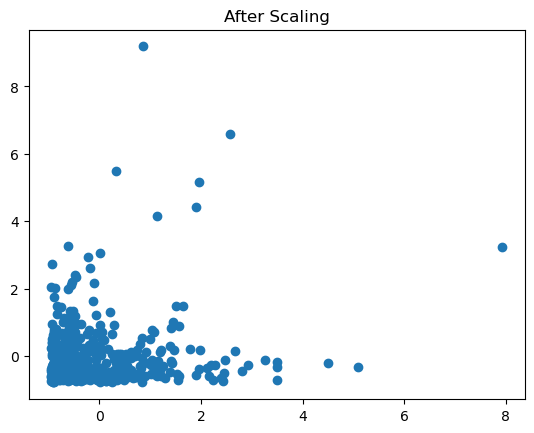

In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df=wholesale_data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.scatter(df['Fresh'], df['Milk'])
plt.title('Before Scaling')
plt.show()

plt.scatter(scaled_df['Fresh'], scaled_df['Milk'])
plt.title('After Scaling')
plt.show()

"스케일링 전과 후를 비교해보니, 변수들이 잘 정규화가 되었군 ㅎㅎ"

# 문제1) 차원 축소(PCA)

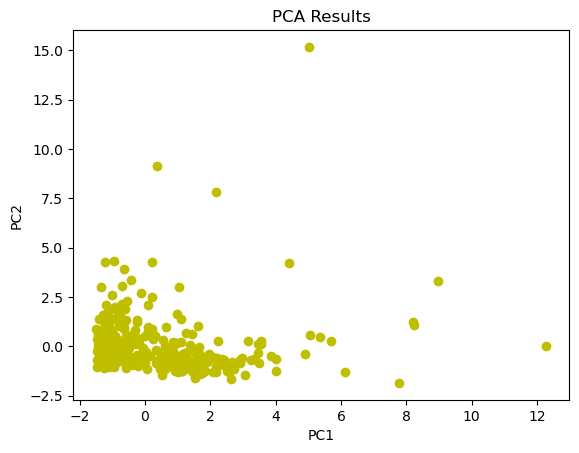

In [5]:
# PCA 모델 생성 및 학습
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=['PC1', 'PC2'])

# PCA 결과 시각화
import matplotlib.pyplot as plt
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='y')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.show()

## 거리 기반 군집화

# 문제 2

### 문제2) K-means

C:\Users\uj200\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


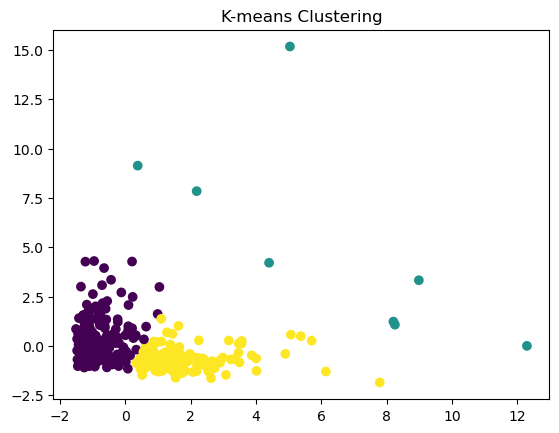

In [7]:
# K-means 군집화
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)

# K-means 결과 시각화
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans.labels_)
plt.title('K-means Clustering')
plt.show()

## 정규분포 기반 군집화

# 문제3) GMM 

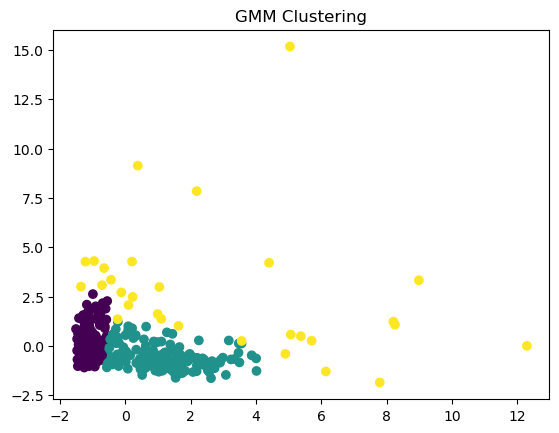

In [8]:
# GMM 군집화
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(pca_df)

# GMM 결과 시각화
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=gmm.predict(pca_df))
plt.title('GMM Clustering')
plt.show()

## 밀도 기반 군집화

### DBSCAN

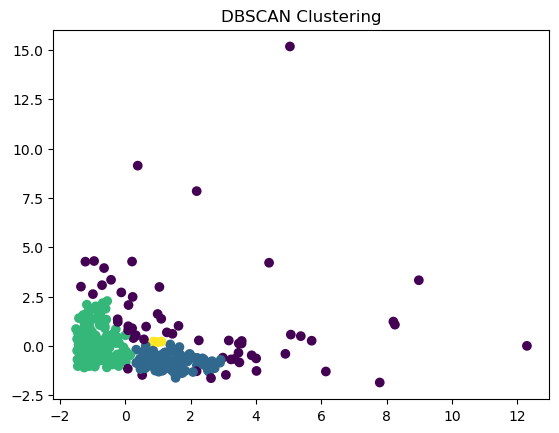

In [9]:
# DBSCAN 군집화
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(pca_df)

# DBSCAN 결과 시각화
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=dbscan.labels_)
plt.title('DBSCAN Clustering')
plt.show()

## 계층적 군집화

- Agglomerative clustering: bottom-up 방식으로, 각 데이터 포인트를 하나의 클러스터로 시작해서 더 이상 클러스터를 합칠 수 없을 때까지 군집화를 진행하는 방식

- Birch clustering: 대규모 데이터셋을 다룰 때 쓰이며, 한 번만 데이터에 대해 검사하여 클러스터를 만드는  트리 구조(CF-tree)에 기반한 방식

# 문제4) Agglomerative clustering

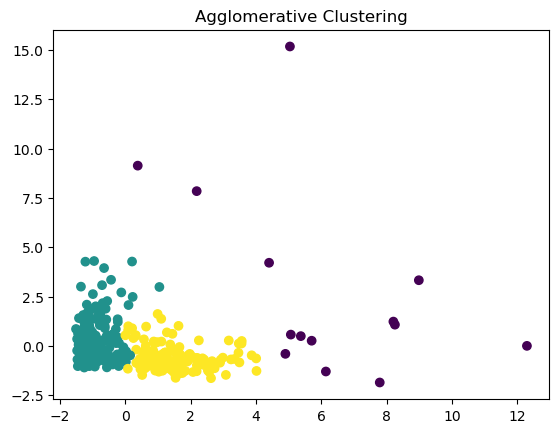

In [10]:
# Agglomerative 군집화
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(pca_df)

# Agglomerative 결과 시각화
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=agg.labels_)
plt.title('Agglomerative Clustering')
plt.show()

## Birch clustering

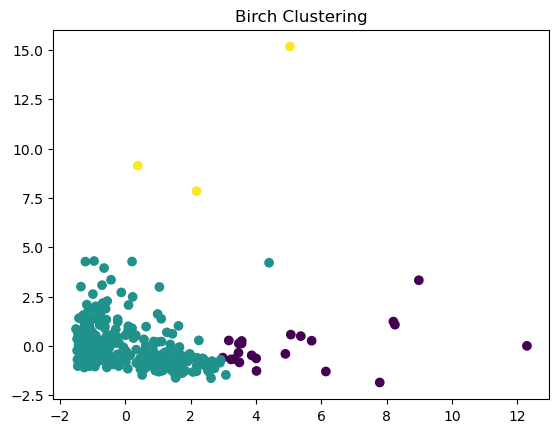

In [11]:
# Birch 군집화
from sklearn.cluster import Birch

birch = Birch(n_clusters=3)
birch.fit(pca_df)

# BIrch 결과 시각화
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=birch.labels_)
plt.title('Birch Clustering')
plt.show()

## 문제 5-1) 군집 평가 : 실루엣 계수 활용

hint) 다 동일한 함수가 들어갑니다. (import 을 보면 더 쉽겠네요)

In [14]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(pca_df, kmeans.labels_)
gmm_score = silhouette_score(pca_df, gmm.predict(pca_df))
dbscan_score = silhouette_score(pca_df, dbscan.labels_)
agg_score = silhouette_score(pca_df, agg.labels_)
birch_score = silhouette_score(pca_df, birch.labels_)

print('1. K-means 실루엣 계수 :', kmeans_score)
print('2. GMM 실루엣 계수:', gmm_score)
print('3. DBSCAN 실루엣 계수:', dbscan_score)
print('4. Agglomerative 실루엣 계수:', agg_score)
print('5. Birch 실루엣 계수:', birch_score)

1. K-means 실루엣 계수 : 0.5599072955885172
2. GMM 실루엣 계수: 0.46197738781637127
3. DBSCAN 실루엣 계수: 0.33417901867189725
4. Agglomerative 실루엣 계수: 0.5401491383875403
5. Birch 실루엣 계수: 0.6419947506395292


## 문제 5-2) 어떤 모델이 가장 잘 군집화가 되었나요? 부장님께 보고 소비자 세분화 군집 모델은?

Hint : 실루엣 계수의 정의를 되새겨보자!

Answer) birch 모델

# 문제6)  K-means의  n_clustering 값을  높이면 성능이 올라가지 않을까??

In [15]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [18]:
import warnings

# 특정 경고 메시지 무시하기
warnings.filterwarnings("ignore")

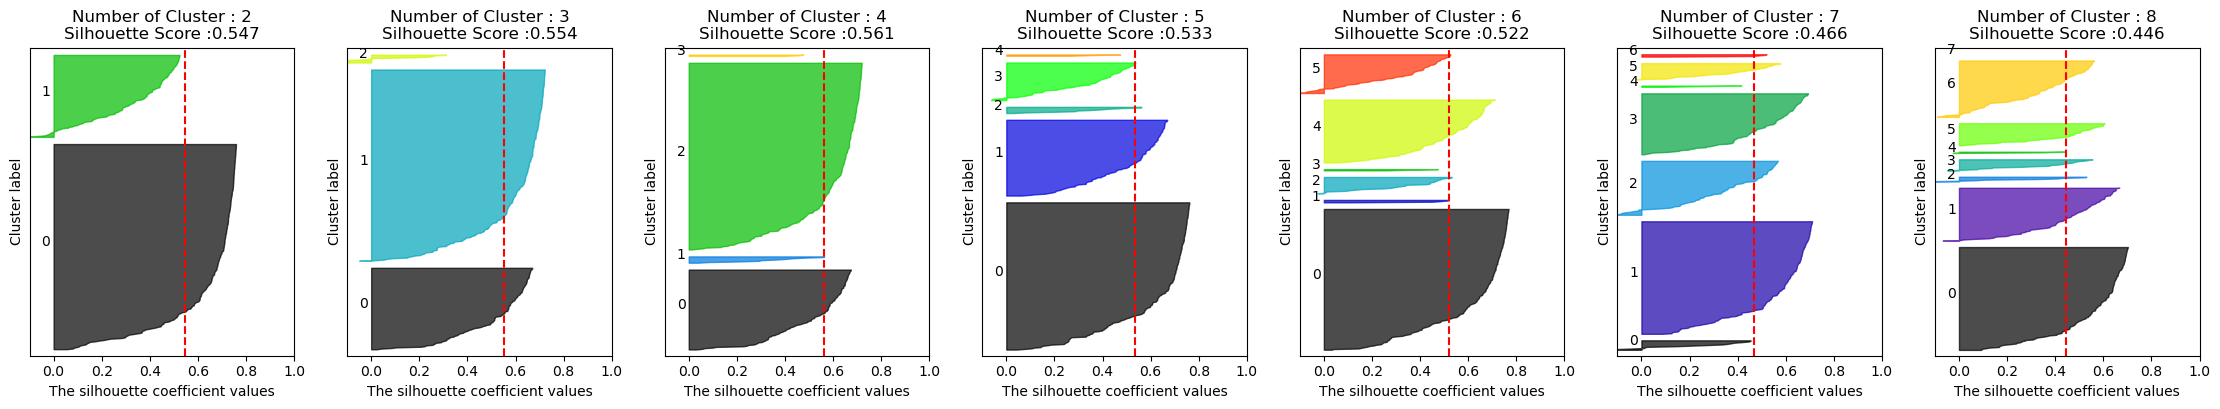

In [19]:
import numpy as np
visualize_silhouette([ 2, 3, 4,5,6,7,8 ], pca_df)

### 그래서, num of cluster 가 몇일때 가장 성능이 좋죠???

Answer) n=4일 때 가장 높다

# 문제 5 & 6 통합) 이 모든 것을 고려했을때 가장 최적의 군집화 기법은 뭘까???

Answer) birch 모델에 num of cluster를 4를 주어서 만들기

# (찐막) 문제7) 이론문제 

각각의 질문에 대해 응답하세요.

1. k-means 알고리즘은 군집의 개수를 사전에 지정해주어야 한다. (T/F)
2. DBSCAN 알고리즘은 군집의 크기나 밀도가 유의미하게 다를 때 사용된다. (T/F)
3. DBSCAN 알고리즘은 일반적으로 군집 내의 데이터들이 밀접하게 모여있지 않더라도 같은 군집으로 분류할 수 있다. (T/F)
4. GMM 알고리즘은 군집화를 위해 사용되는 변수들이 모두 독립적이라는 가정을 한다. (T/F)
5. GMM 알고리즘은 모든 군집이 동일한 형태의 확률분포를 따른다고 가정하며, 이를 통해 군집화를 수행한다. (T/F)

답)
<br>1. T
<br>2. T
<br>3. F 모여있어야 한다
<br>4. T
<br>5. F 파라미터가 다를 수 있다